# Finding lane lines

This image is:  <class 'numpy.ndarray'> with dimensions: (540, 960, 3)


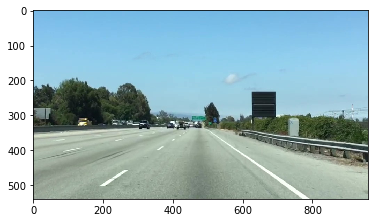

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
image = mpimg.imread('test.jpg')
print('This image is: ',type(image), 
      'with dimensions:', image.shape)
plt.imshow(image)
plt.show()

In [6]:
ysize, xsize, _ = image.shape
# always copy the image
color_select = np.copy(image)
rgb_threshold = [200, 200, 200]

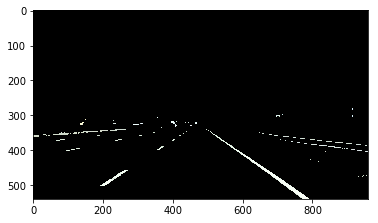

In [36]:
# Identify pixels below the threshold
color_thresholds = (image[:, :, 0] < rgb_threshold[0]) | \
             (image[:, :, 1] < rgb_threshold[1]) | \
             (image[:, :, 2] < rgb_threshold[2])
color_select[color_thresholds] = [0, 0, 0]
plt.imshow(color_select)
plt.show()

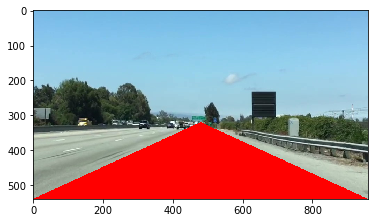

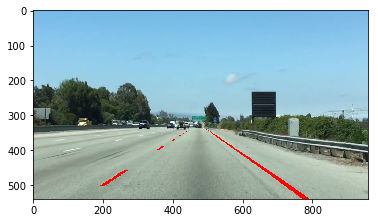

In [48]:
line_image = np.copy(image)
region_image = np.copy(image)

# Define a triangle region of interest 
# Keep in mind the origin (x=0, y=0) is in the upper left in image processing
left_bottom = [0, 539]
right_bottom = [959, 539]
apex = [480, 320]

# Fit lines (y=Ax+B) to identify the  3 sided region of interest
# np.polyfit() returns the coefficients [A, B] of the fit
fit_left = np.polyfit((left_bottom[0], apex[0]), (left_bottom[1], apex[1]), 1)
fit_right = np.polyfit((right_bottom[0], apex[0]), (right_bottom[1], apex[1]), 1)
fit_bottom = np.polyfit((left_bottom[0], right_bottom[0]), (left_bottom[1], right_bottom[1]), 1)

# Find the region inside the lines
XX, YY = np.meshgrid(np.arange(0, xsize), np.arange(0, ysize))
region_thresholds = (YY > (XX*fit_left[0] + fit_left[1])) & \
                    (YY > (XX*fit_right[0] + fit_right[1])) & \
                    (YY < (XX*fit_bottom[0] + fit_bottom[1]))

        
# show region
region_image[region_thresholds] = [255, 0, 0]
plt.imshow(region_image)
plt.show()

# Color pixels red which are inside the region of interest
line_image[~color_thresholds & region_thresholds] = [255, 0, 0]


# Display the image
plt.imshow(line_image)
plt.show()
